<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>

# Morphological Operators

Morphological Operators are sets of Kernels that can achieve a variety of effects, such as reducing noise. Certain operators are very good at reducing black points on a white background (and vice versa).
Other operators can also achieve an erosion and dilation effect that can add or erode from an existing image. This effect is most easily seen on text data, so we will practice various morphological operators on some simple white text on a black background.

### Types of operators:

<img src="info_3.png">

Math behind morphology - https://en.wikipedia.org/wiki/Mathematical_morphology
Really great link on morphological operators - https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm

- **Foreground:** The elements of an image which lie closest to the picture plane.
- **Background:** The elements in the image furthest away.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Creating the white text with black background:

In [2]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
img = load_img()

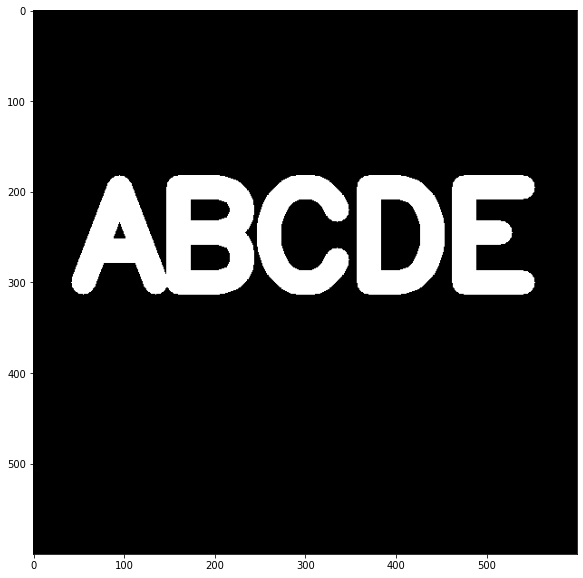

In [5]:
display_img(img)

## Erosion

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

**dst = cv2.erode(src, kernel, anchor, iterations)** 

- **src:** It is the image which is to be eroded .
- **kernel:** A structuring element used for erosion. If element = Mat(), a 3 x 3 rectangular structuring element is used. Kernel can be created using getStructuringElement.
- **dst:** It is the output image of the same size and type as src.
- **anchor:** It is a variable of type integer representing anchor point and it’s default value Point is (-1, -1) which means that the anchor is at the kernel center.
- **iterations:** It is number of times erosion is applied.

The more iterations we applicate, the eroder the image will get. Let's create a kernel that satisfies the conditions for this operator. **This kernel will be used along the notebook.**

In [6]:
kernel = np.ones((5,5),np.uint8)

In [8]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

- **1 iteration:**

In [7]:
erosion1 = cv2.erode(img,kernel,iterations = 1)

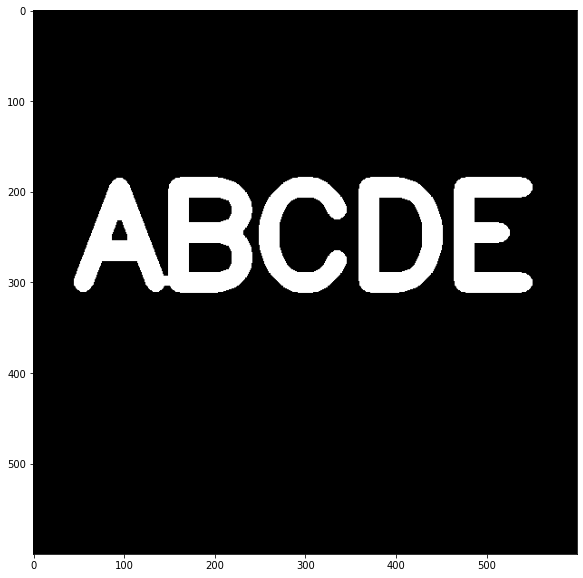

In [9]:
display_img(erosion1)

We can appreciate better the effect of erosion on the join between the letters **A** and **B**, now is tinier than the original image.

Now, we will take more iterations to make the letters tinier.

- **4 iterations:**

In [10]:
img = load_img()
kernel = np.ones((5,5),np.uint8)
erosion5 = cv2.erode(img,kernel,iterations = 4)

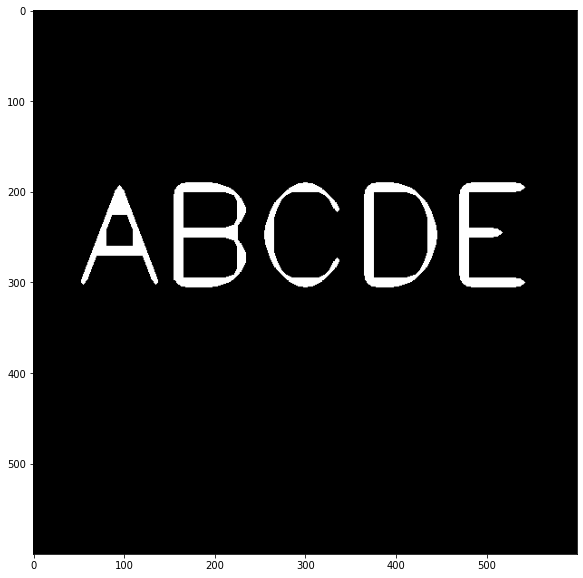

In [11]:
display_img(erosion5)

Now, the effect of erosion is obvious.

**dst = cv2.morphologyEx(src, dst, operation, element):**

- **src:** Source (input) image.
- **dst:** Output image.
- **operation:** The kind of morphology transformation to be performed. Note that we have 5 alternatives:
    - Opening : MORPH_OPEN : 2
    - Closing : MORPH_CLOSE: 3
    - Gradient : MORPH_GRADIENT: 4
    - Top Hat : MORPH_TOPHAT: 5
    - Black Hat : MORPH_BLACKHAT: 6
As you can see the values range from <2-6>, that is why we add (+2) to the values entered by the Trackbar:
- **element:** The kernel to be used. We use the function cv::getStructuringElement to define our own structure.


## Opening (MORPH_OPEN)
Opening is erosion followed by dilation. Useful in removing background noise!

In [12]:
img = load_img()

First, create the *white noise*, this noise is for background. To do this, just add white pixels randomly to the image.

So, we create an image, with the same size as the abcd text image, full of random 255 value pixels.

In [13]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [14]:
white_noise

array([[1, 0, 0, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 1, 1]])

In [15]:
white_noise = white_noise*255

Now, we verify the dimention of the white noise image.

In [16]:
white_noise.shape

(600, 600)

In [17]:
img.shape

(600, 600)

Then, we added to *img*. Do not worry for having 500 values pixels since they will be taken as 255 value pixels.

In [18]:
noise_img = white_noise+img

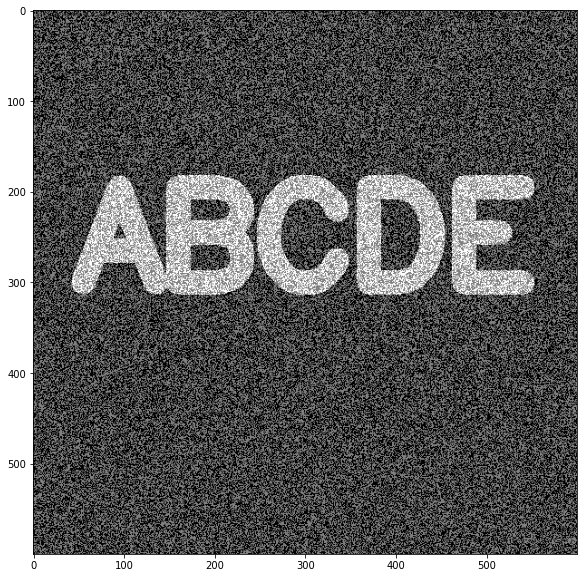

In [19]:
display_img(noise_img)

In [20]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

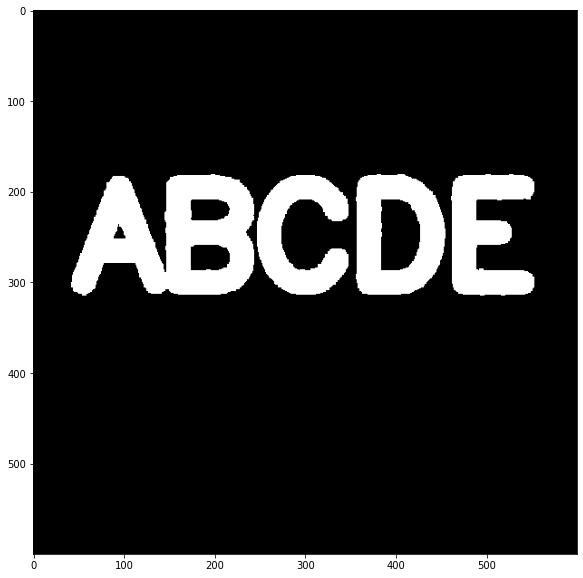

In [21]:
display_img(opening)

The noise was reduced amazingly, how ever, there are some little imperfections in the boundaries of the letters in comparison to the original image.

### Closing (MORPH_CLOSE)
 Useful in removing noise from foreground objects, such as black dots on top of the white text.
 
 To make the black noise, we need to create an image with random -255 value pixels. Its creation is analogous to white noise.

In [22]:
img = load_img()

In [23]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [24]:
black_noise

array([[1, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 1, 1]])

In [25]:
black_noise= black_noise * -255

In [26]:
black_noise_img = img + black_noise

In [27]:
black_noise_img

array([[-255., -255.,    0., ...,    0.,    0., -255.],
       [   0., -255.,    0., ...,    0.,    0.,    0.],
       [   0., -255., -255., ..., -255.,    0.,    0.],
       ...,
       [-255., -255.,    0., ...,    0., -255., -255.],
       [   0., -255.,    0., ..., -255., -255., -255.],
       [-255.,    0.,    0., ...,    0., -255., -255.]])

All -255 values will be setted to zero.

In [28]:
black_noise_img[black_noise_img==-255] = 0

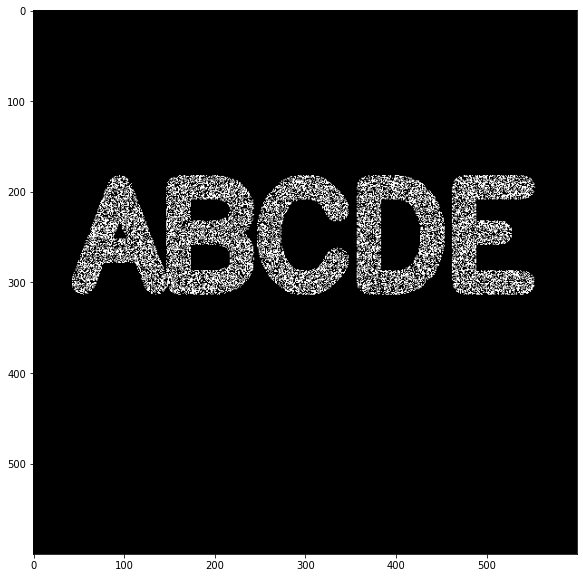

In [29]:
display_img(black_noise_img)

In [30]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

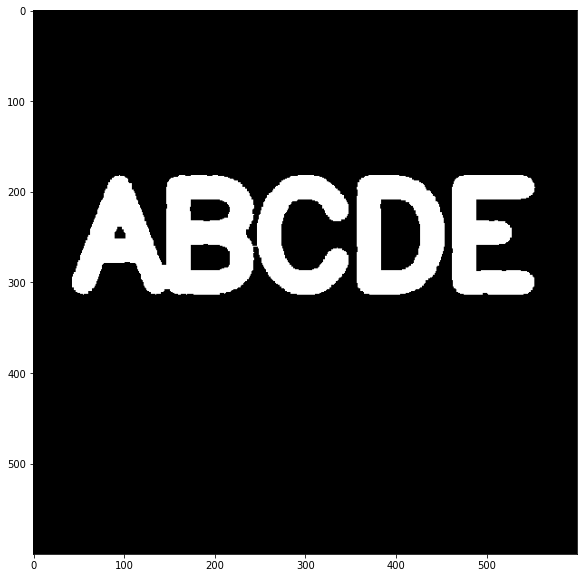

In [31]:
display_img(closing)

As opening do, closing reduces almost all the noise, but the imperfections are visible in boundaries.

## Morphological Gradient (MORPH_GRADIENT)

Difference between dilation and erosion of an image. It is good at detecting edges or boundaries.

In [32]:
img = load_img()

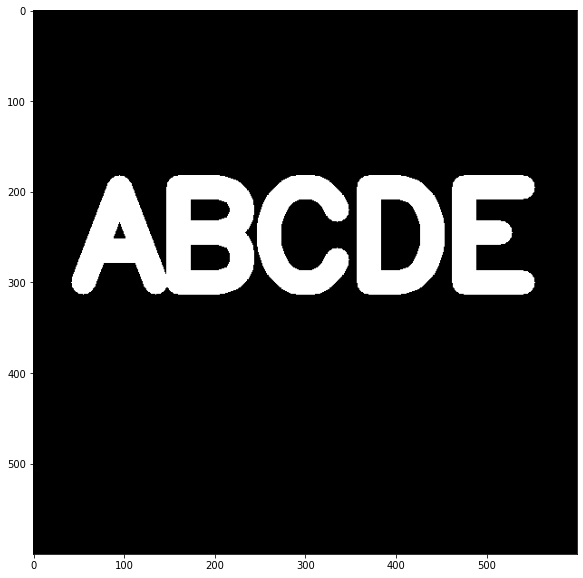

In [33]:
display_img(img)

In [34]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

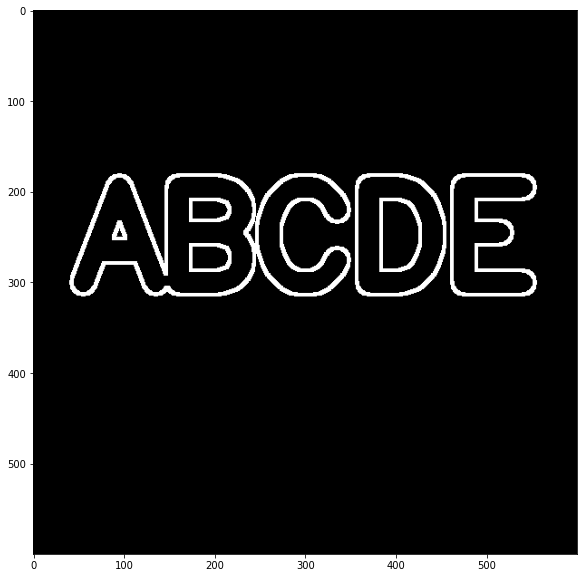

In [35]:
display_img(gradient)

As we can appreciate, it filters the boundaries of the letters.

# Great work!